## YOLO (You Only Look Once)

So far we have learned number of region based methods for recognizing and locating multiple objects in a scene. Architectures like `Faster R-CNN` are accurate but the model itself is quite complex, with multiple outputs that are each potential source of error. Once trained they're still not fast enough to run in real time. In this lesson we will be learning about `YOLO which stands for You Onlu look Once`, and it's a real time object detection algorithm which avoid spending time on generating region proposals. Instead of the locating objects perfectly, it prioritizes the speed and recognition. because these algorithm is being used in situations where the real time object detection is mandatory. Ex : Self Driving Cars

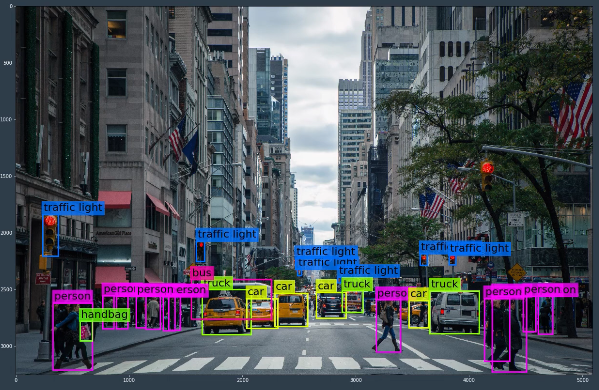

__Lesson outline__

In this lesson, we will learn about YOLO (You Only Look Once). Here are the topics we will discuss.

* YOLO output
* Sliding windows
* CNN and sliding windows
* Using a grid
* Training on a grid
* Generating bounding boxes
* Intersection over Union (IoU)
* Non-maximal suppression
* Anchor boxes
* YOLO Algorithm


### YOLO Output

When we talked about the localization in images, we talked about creating a CNN that could output a predicted class front object in an image and a predicted buunding box for that object. 
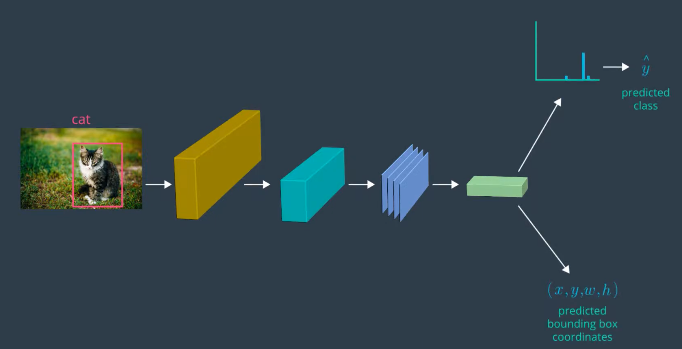

In the CNN that we have seen, These oututs are analyzed separately in a the network trains by using a weighted combination of classification and regression losses. Another way to process these outputs is by merging them nto single output vector, which is what the YOLO algorithm does. 

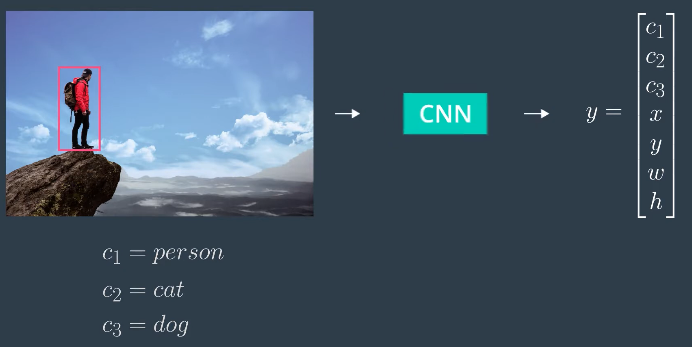  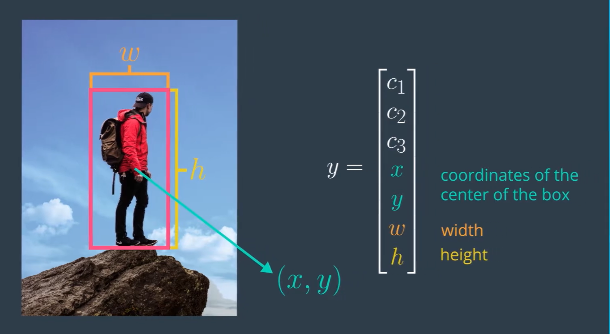

### Sliding Windows 

In regular R-CNN the sliding window go through the entire image and then process that image through the fully connected layer to detect an object in the cropped image.


In `YOLO` the sliding windows works as follows, it will have a single vector generated by the each sliding image which consist of the probability of the object presence and also the pre defined object along with the boundaries as follows. If there is no object detected then we will ignore that part of the image and we will go to next slide with a required stride.

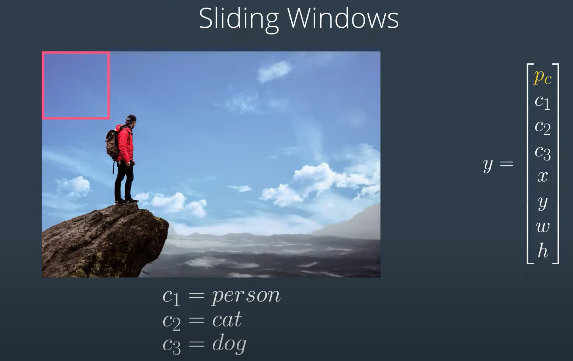 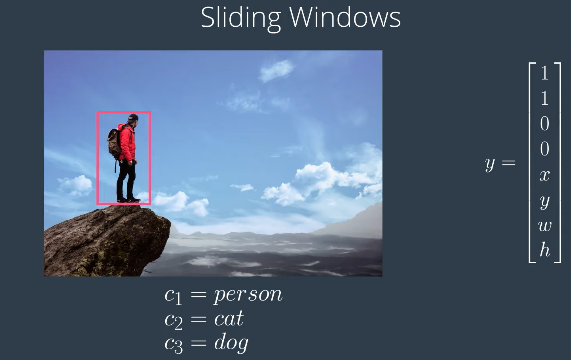

## Using a Grid

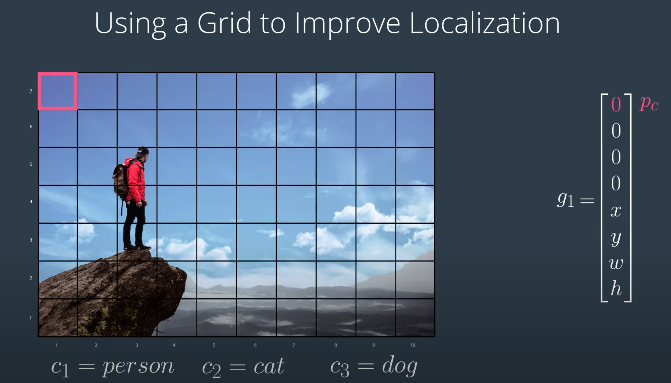 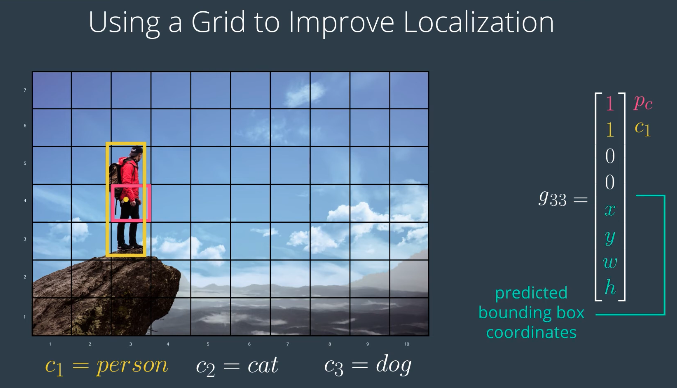

## Training on a Grid
* Break image into a grid
* Manually assign a ground truth vector to each grid cell

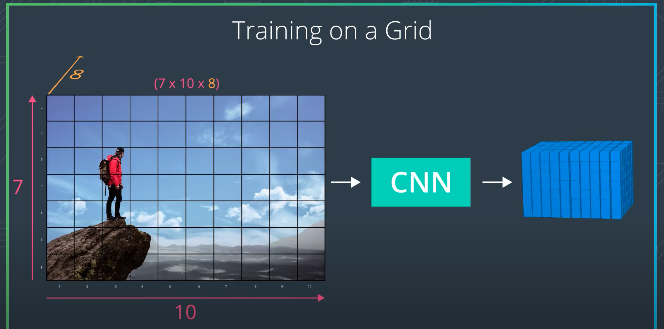 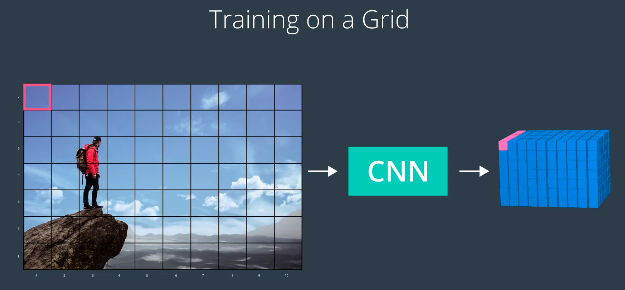


## Generating Bounding Boxes
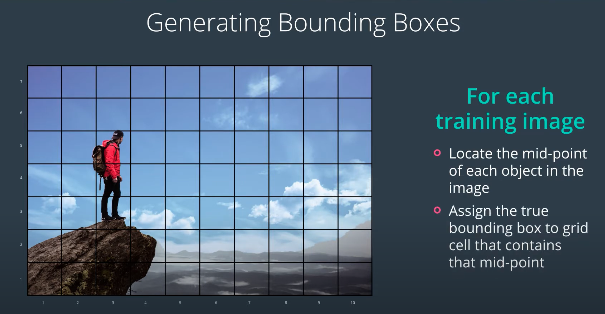 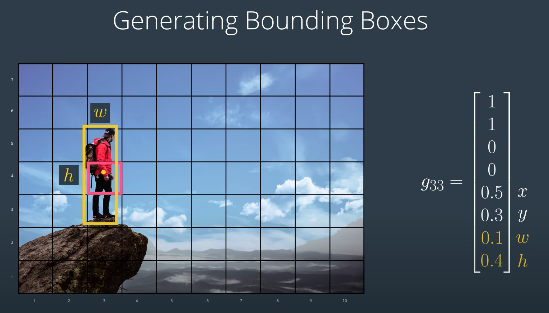

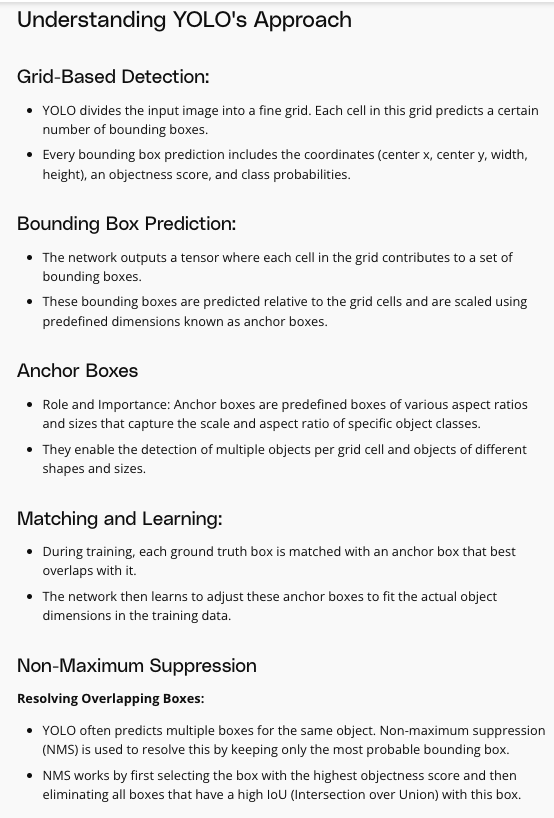 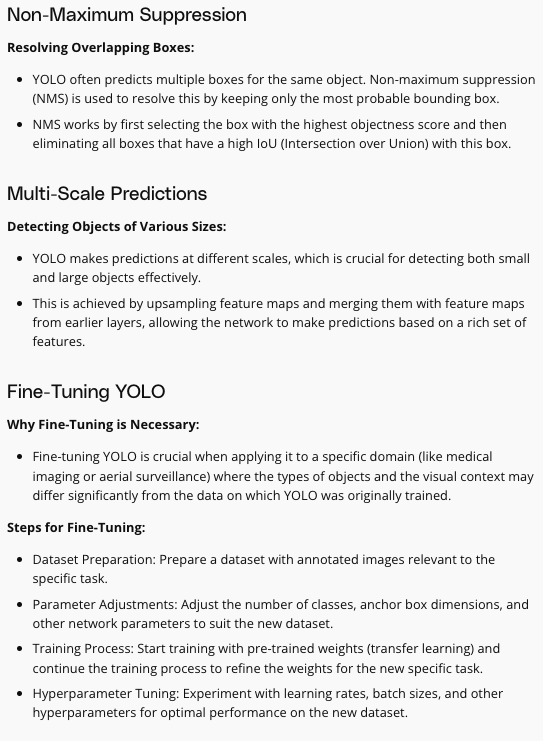

__Challenges and Limitations__

`Balance Between Speed and Accuracy:`
    YOLO's design prioritizes speed, which can sometimes lead to a trade-off in terms of accuracy, especially for small objects or objects with unusual aspect ratios.
    
`Resource Intensity for Training:`
    Fine-tuning and training YOLO on a new dataset can be resource-intensive, requiring significant computational power.


__Intersection over Union :__

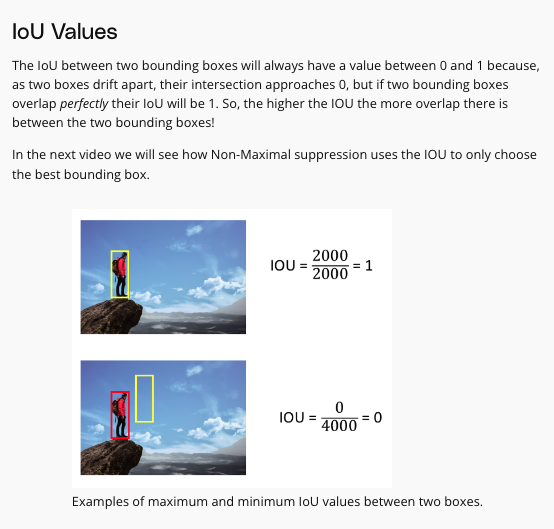

### Non-Maximal Suppression Steps
In practice Non-maximal Suppression is implemented in a few steps.

1. Look at the output vector of each grid cell. Recall that each grid cell will have an output vector with a Pc value and bounding box coordinates.
2. Remove all bounding boxes that have a Pc value less than or equal to some threshold, say 0.5. Therefore, we will only keep a bounding box, if there is more than a 50% chance of an object being inside of it.
3. Select the bounding box with the highest Pc value.
4. Remove all the bounding boxes that have a high IoU* with the box selected in the last step.
A high IoU usually means a that the IoU is greater than or equal to 0.5.

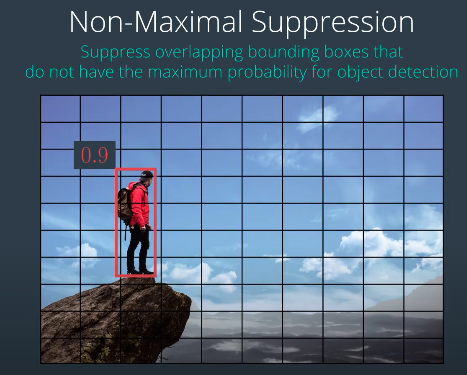

### Anchor Boxes and Vehicle Detection

Allow one grid box to detect multiple objects, sometimes the objects overalaps with other objects in the image which means a single grig can contain more than 1 object. In this case we use the anchor boxes to detect the objects in the image using the grids. But even this method also do have some limitations like it fails when it will have more than 2 objects in the same grid or have same kind of two objects in a single grid.

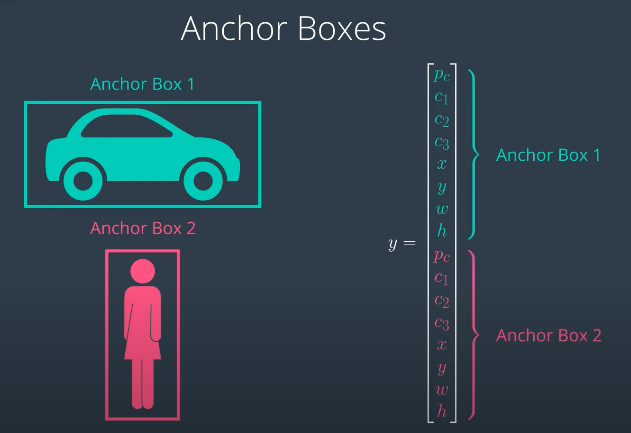 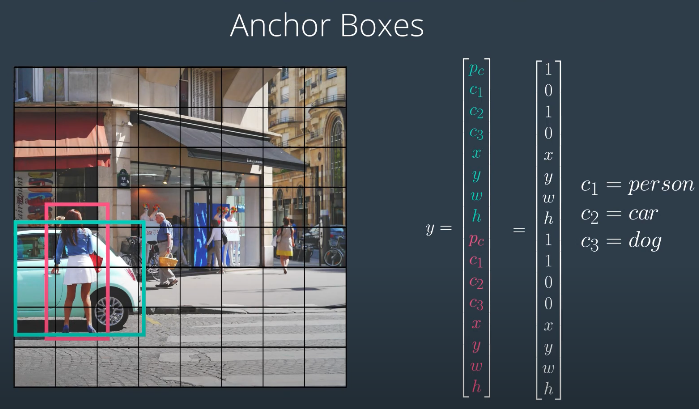

## YOLO Algorithm

* `Input Image Processing:` The YOLO algorithm takes an input image and detects multiple objects.
* `CNN Training:` A Convolutional Neural Network (CNN) is trained to recognize various classes, such as traffic lights, cars, people, and trucks.
* `Anchor Boxes:` Two types of anchor boxes (tall and wide) are used to handle overlapping objects of different shapes.
* `Grid Division:` The test image is divided into a grid, and the network produces output vectors for each grid cell.
* `Output Vectors:` These vectors indicate whether a cell contains an object, the class of the object, and the bounding boxes for the object.
* `Non-Maximal Suppression:` This technique is used to eliminate unlikely bounding boxes based on a confidence value (PC value) and to select the bounding boxes with the highest confidence.
* `Final Detection:` The result shows the detected objects in the image, demonstrating why YOLO is widely used for object detection.

# You Only Look Once (YOLO)

### Introduction

As you learned in the previous lessons, YOLO is a state-of-the-art, real-time object detection algorithm. In this notebook, we will apply the YOLO algorithm to detect objects in images. We have provided a series of images that you can test the YOLO algorithm on. Below is a list of the available images that you can load:

* cat.jpg
* city_scene.jpg
* dog.jpg
* dog2.jpg
* eagle.jpg
* food.jpg
* giraffe.jpg
* horses.jpg
* motorbike.jpg
* person.jpg
* surf.jpg
* wine.jpg

These images are located in the`./images/`folder. We encourage you to test the YOLO algorithm on your own images as well. Have fun!

# Importing Resources

We will start by loading the required packages into Python. We will be using *OpenCV* to load our images, *matplotlib* to plot them, a`utils` module that contains some helper functions, and a modified version of *Darknet*. YOLO uses *Darknet*, an open source, deep neural network framework written by the creators of YOLO. The version of *Darknet* used in this notebook has been modified to work in PyTorch 0.4 and has been simplified because we won't be doing any training. Instead, we will be using a set of pre-trained weights that were trained on the Common Objects in Context (COCO) database. For more information on *Darknet*, please visit <a href="https://pjreddie.com/darknet/">Darknet</a>.

In [ ]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet